# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2,chi2_contingency


In [2]:
data=pd.read_csv(r"C:\Users\JEEVAN\Downloads\h1n1_vaccine_prediction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
data.shape

(26707, 34)

In [5]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

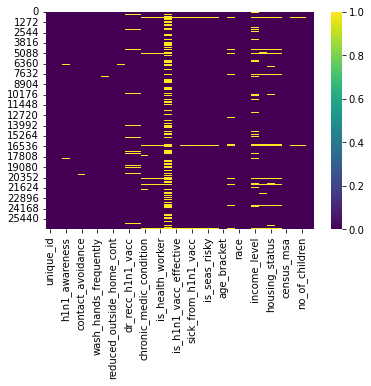

In [7]:
sns.heatmap(data.isnull(),cmap='viridis')

# working on Target variable

In [8]:
data.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:
data.h1n1_vaccine.isnull().sum()

0

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

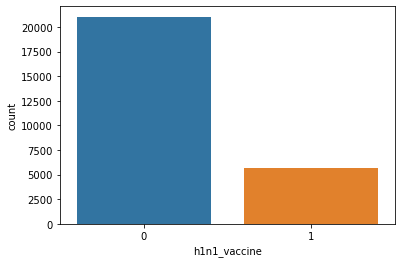

In [10]:
# count plot
sns.countplot(data.h1n1_vaccine)
# 1 - is recived the h1n1 vaccine
# 0 - is not recived the h1n1 vaccine

In [11]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## h1n1_worry

In [12]:
data.h1n1_worry.isnull().sum()

92

In [13]:
data.h1n1_worry.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [14]:
data.h1n1_worry.fillna(data.h1n1_worry.median(),inplace=True)

In [15]:
data.h1n1_worry.isnull().sum()

0

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

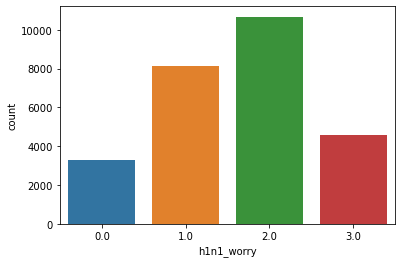

In [16]:
sns.countplot(data.h1n1_worry)

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

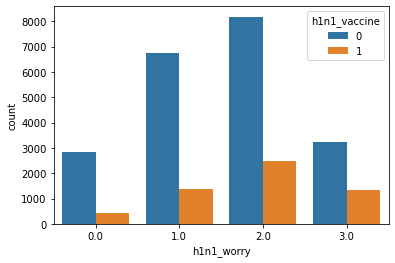

In [17]:
sns.countplot(data.h1n1_worry,hue=data.h1n1_vaccine)

In [18]:
ct_h1n1_worry=pd.crosstab(data.h1n1_worry,data.h1n1_vaccine)
ct_h1n1_worry

h1n1_vaccine,0,1
h1n1_worry,,
0.0,2849,447
1.0,6756,1397
2.0,8178,2489
3.0,3250,1341


In [19]:
chi2_contingency(ct_h1n1_worry,correction=False)

(400.4620379252815,
 1.7582253892199257e-86,
 3,
 array([[2595.752724  ,  700.247276  ],
        [6420.86527877, 1732.13472123],
        [8400.75676789, 2266.24323211],
        [3615.62522934,  975.37477066]]))

## h1n1_worry  is a good predictor

# h1n1_awareness

In [20]:
data.h1n1_awareness.isnull().sum()

116

In [21]:
data.h1n1_awareness.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [22]:
data.h1n1_awareness.fillna(data.h1n1_awareness.median(),inplace=True)

In [23]:
data.h1n1_awareness.isnull().sum()

0

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

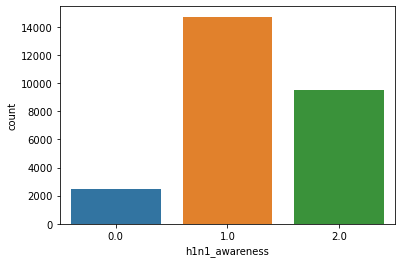

In [24]:
sns.countplot(data.h1n1_awareness)

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

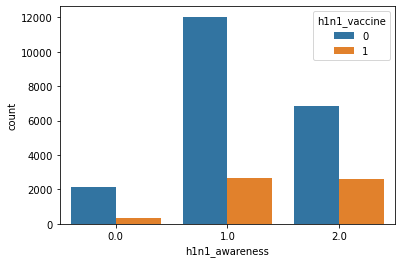

In [25]:
sns.countplot(data.h1n1_awareness,hue=data.h1n1_vaccine)

In [26]:
ct_h1n1_awareness=pd.crosstab(data.h1n1_awareness,data.h1n1_vaccine)
ct_h1n1_awareness

h1n1_vaccine,0,1
h1n1_awareness,,
0.0,2145,361
1.0,12039,2675
2.0,6849,2638


In [27]:
chi2_contingency(ct_h1n1_awareness,correction=False)

(396.7931990299987,
 6.877832615401085e-87,
 2,
 array([[ 1973.59111843,   532.40888157],
        [11587.95679035,  3126.04320965],
        [ 7471.45209121,  2015.54790879]]))

## h1n1_awareness is a good predictor

In [28]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# antiviral_medication

In [29]:
data.antiviral_medication.isnull().sum()

71

In [30]:
data.antiviral_medication.value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [31]:
data.antiviral_medication.fillna(data.antiviral_medication.median(),inplace=True)

In [32]:
data.antiviral_medication.isnull().sum()

0

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

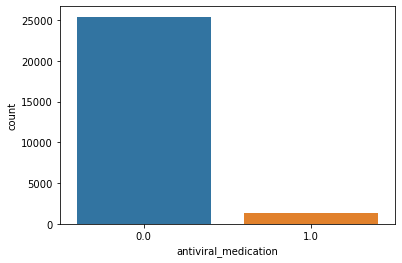

In [33]:
sns.countplot(data.antiviral_medication)

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

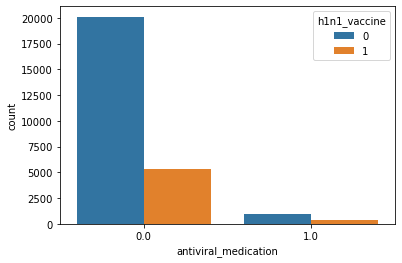

In [34]:
sns.countplot(data.antiviral_medication,hue=data.h1n1_vaccine)

In [35]:
ct_antiviral_medication=pd.crosstab(data.antiviral_medication,data.h1n1_vaccine)
ct_antiviral_medication

h1n1_vaccine,0,1
antiviral_medication,,
0.0,20103,5303
1.0,930,371


In [36]:
chi2_contingency(ct_antiviral_medication,correction=False)

(43.21485853065721,
 4.904680004058131e-11,
 1,
 array([[20008.40221665,  5397.59778335],
        [ 1024.59778335,   276.40221665]]))

## antiviral_medication is a good predictor

In [37]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [38]:
data.contact_avoidance.isnull().sum()

208

In [39]:
data.contact_avoidance.value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [40]:
data.contact_avoidance.fillna(data.contact_avoidance.median(),inplace=True)

In [41]:
data.contact_avoidance.isnull().sum()

0

<AxesSubplot:xlabel='contact_avoidance', ylabel='count'>

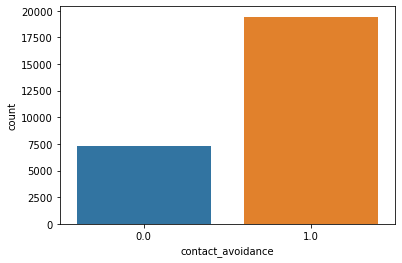

In [42]:
sns.countplot(data.contact_avoidance)

<AxesSubplot:xlabel='contact_avoidance', ylabel='count'>

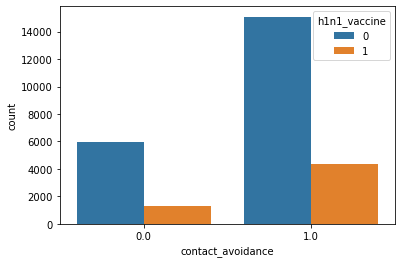

In [43]:
sns.countplot(data.contact_avoidance,hue=data.h1n1_vaccine)

In [44]:
ct_contact_avoidance=pd.crosstab(data.contact_avoidance,data.h1n1_vaccine)
ct_contact_avoidance

h1n1_vaccine,0,1
contact_avoidance,,
0.0,5954,1317
1.0,15079,4357


In [45]:
chi2_contingency(ct_contact_avoidance,correction=False)

(58.587201164415866,
 1.9447747613873533e-14,
 1,
 array([[ 5726.24941027,  1544.75058973],
        [15306.75058973,  4129.24941027]]))

## contact_avoidance it is a good predictor

In [46]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# bought_face_mask

In [47]:
data.bought_face_mask.isnull().sum()

19

In [48]:
data.bought_face_mask.value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [49]:
data.bought_face_mask.fillna(data.bought_face_mask.median(),inplace=True)

<AxesSubplot:xlabel='bought_face_mask', ylabel='count'>

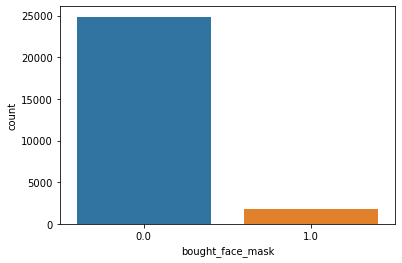

In [50]:
sns.countplot(data.bought_face_mask)

<AxesSubplot:xlabel='bought_face_mask', ylabel='count'>

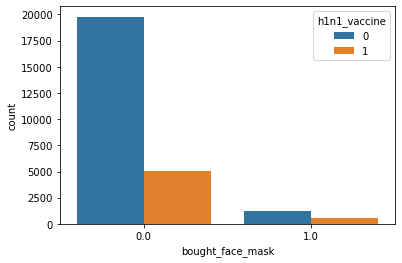

In [51]:
sns.countplot(data.bought_face_mask,hue=data.h1n1_vaccine)

In [52]:
ct_bought_face_mask=pd.crosstab(data.bought_face_mask,data.h1n1_vaccine)
ct_bought_face_mask

h1n1_vaccine,0,1
bought_face_mask,,
0.0,19778,5088
1.0,1255,586


In [53]:
chi2_contingency(ct_bought_face_mask,correction=False)

(132.4120533980558,
 1.2157495033471819e-30,
 1,
 array([[19583.12719512,  5282.87280488],
        [ 1449.87280488,   391.12719512]]))

## bought_face_mask is a good predictor

# wash_hands_frequently

In [54]:
data.wash_hands_frequently.isnull().sum()

42

In [55]:
data.wash_hands_frequently.value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [56]:
data.wash_hands_frequently.fillna(data.wash_hands_frequently.median(),inplace=True)

In [57]:
data.wash_hands_frequently.isnull().sum()

0

<AxesSubplot:xlabel='wash_hands_frequently', ylabel='count'>

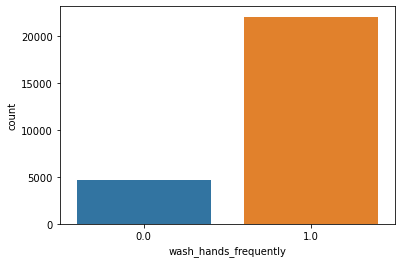

In [58]:
sns.countplot(data.wash_hands_frequently)

<AxesSubplot:xlabel='wash_hands_frequently', ylabel='count'>

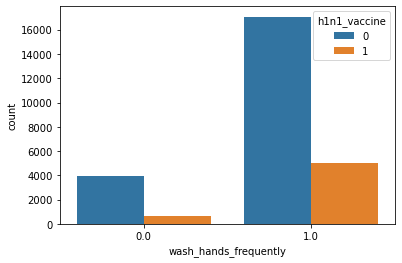

In [59]:
sns.countplot(data.wash_hands_frequently,hue=data.h1n1_vaccine)

In [60]:
ct_wash_hands_frequently=pd.crosstab(data.wash_hands_frequently,data.h1n1_vaccine)
ct_wash_hands_frequently

h1n1_vaccine,0,1
wash_hands_frequently,,
0.0,3971,679
1.0,17062,4995


In [61]:
chi2_contingency(ct_wash_hands_frequently,correction=False)

(148.50736844984505,
 3.6747179620018487e-34,
 1,
 array([[ 3662.09046317,   987.90953683],
        [17370.90953683,  4686.09046317]]))

## wash_hands_frequently is a good predictor

## avoid_large_gatherings

In [62]:
data.avoid_large_gatherings.isnull().sum()

87

In [63]:
data.avoid_large_gatherings.fillna(data.avoid_large_gatherings.median(),inplace=True)

In [64]:
data.avoid_large_gatherings.isnull().sum()

0

In [65]:
data.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

<AxesSubplot:xlabel='avoid_large_gatherings', ylabel='count'>

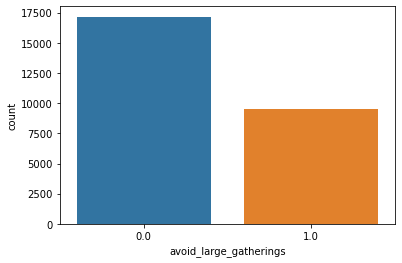

In [66]:
sns.countplot(data.avoid_large_gatherings)

<AxesSubplot:xlabel='avoid_large_gatherings', ylabel='count'>

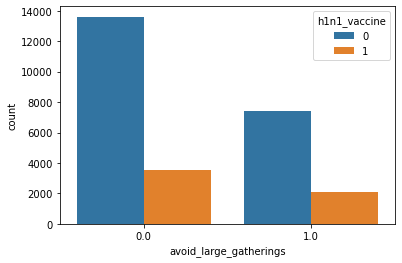

In [67]:
sns.countplot(data.avoid_large_gatherings,hue=data.h1n1_vaccine)

In [68]:
ch_avoid_large_gatherings=pd.crosstab(data.avoid_large_gatherings,data.h1n1_vaccine)
ch_avoid_large_gatherings

h1n1_vaccine,0,1
avoid_large_gatherings,,
0.0,13609,3551
1.0,7424,2123


In [69]:
chi2_contingency(ch_avoid_large_gatherings,correction=False)

(8.738667138185196,
 0.0031153215196716723,
 1,
 array([[13514.29512862,  3645.70487138],
        [ 7518.70487138,  2028.29512862]]))

## avoid_large_gatherings is a good predictor (p-value =0.0031) 

In [70]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# reduced_outside_home_cont

In [71]:
data.reduced_outside_home_cont.isnull().sum()

82

In [72]:
data.reduced_outside_home_cont.fillna(data.reduced_outside_home_cont.median(),inplace=True)

In [73]:
data.reduced_outside_home_cont.isnull().sum()

0

In [74]:
data.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

<AxesSubplot:xlabel='reduced_outside_home_cont', ylabel='count'>

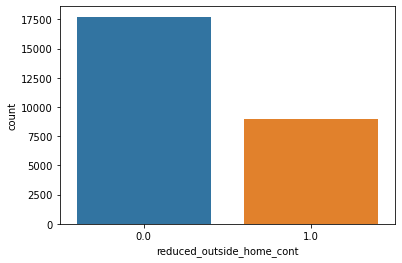

In [75]:
sns.countplot(data.reduced_outside_home_cont)

Text(0.5, 1.0, 'reduced_outside_home_cont vs h1n1_vaccine')

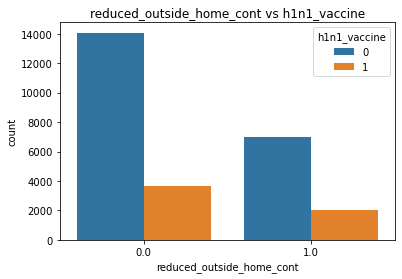

In [76]:
sns.countplot(data.reduced_outside_home_cont,hue=data.h1n1_vaccine)
plt.title('reduced_outside_home_cont vs h1n1_vaccine')

In [77]:
ct_reduced_outside_home_cont=pd.crosstab(data.reduced_outside_home_cont,data.h1n1_vaccine)
ct_reduced_outside_home_cont

h1n1_vaccine,0,1
reduced_outside_home_cont,,
0.0,14074,3652
1.0,6959,2022


In [78]:
chi2_contingency(ct_reduced_outside_home_cont,correction=False)

(13.019843626723468,
 0.0003082075507773056,
 1,
 array([[13960.04635489,  3765.95364511],
        [ 7072.95364511,  1908.04635489]]))

## reduced_outside_home_cont is a good predictor where p-value(0.00030)

In [79]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## avoid_touch_face

In [80]:
data.avoid_touch_face.isnull().sum()

128

In [81]:
data.avoid_touch_face.value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

<AxesSubplot:xlabel='avoid_touch_face', ylabel='count'>

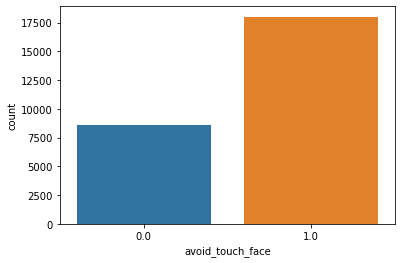

In [82]:
sns.countplot(data.avoid_touch_face)

<AxesSubplot:xlabel='avoid_touch_face', ylabel='count'>

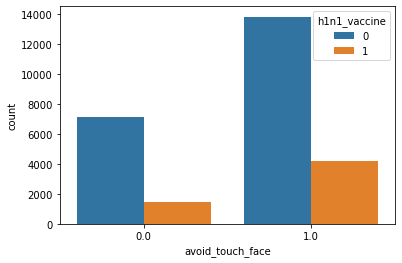

In [83]:
sns.countplot(data.avoid_touch_face,hue=data.h1n1_vaccine)

In [84]:
ct_avoid_touch_face=pd.crosstab(data.avoid_touch_face,data.h1n1_vaccine)
ct_avoid_touch_face

h1n1_vaccine,0,1
avoid_touch_face,,
0.0,7117,1461
1.0,13806,4195


In [85]:
chi2_contingency(ct_avoid_touch_face,correction=False)

(136.4407784688517,
 1.5980952519304591e-31,
 1,
 array([[ 6752.60521464,  1825.39478536],
        [14170.39478536,  3830.60521464]]))

## avoid_touch_face  is a good predictor

In [86]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## dr_recc_h1n1_vacc

In [87]:
data.dr_recc_h1n1_vacc.isnull().sum()

2160

In [88]:
data.dr_recc_h1n1_vacc.value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [89]:
data.dr_recc_h1n1_vacc.fillna(data.dr_recc_h1n1_vacc.median(),inplace=True)

In [90]:
data.dr_recc_h1n1_vacc.isnull().sum()

0

<AxesSubplot:xlabel='dr_recc_h1n1_vacc', ylabel='count'>

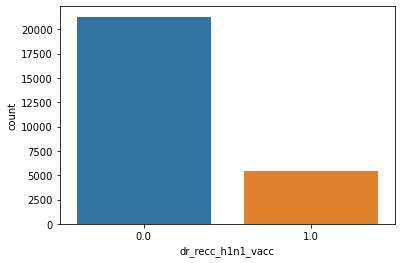

In [91]:
sns.countplot(data.dr_recc_h1n1_vacc)

<AxesSubplot:xlabel='dr_recc_h1n1_vacc', ylabel='count'>

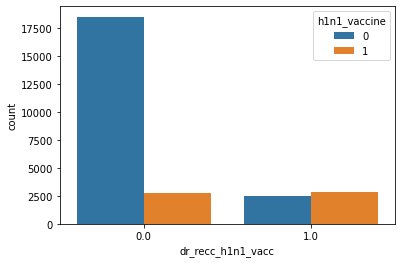

In [92]:
sns.countplot(data.dr_recc_h1n1_vacc,hue=data.h1n1_vaccine)

In [93]:
ct_dr_recc_h1n1_vacc=pd.crosstab(data.dr_recc_h1n1_vacc,data.h1n1_vaccine)
ct_dr_recc_h1n1_vacc

h1n1_vaccine,0,1
dr_recc_h1n1_vacc,,
0.0,18504,2795
1.0,2529,2879


In [94]:
chi2_contingency(ct_dr_recc_h1n1_vacc,correction=False)

(4147.691754581108,
 0.0,
 1,
 array([[16773.94941401,  4525.05058599],
        [ 4259.05058599,  1148.94941401]]))

## dr_recc_h1n1_vacc  is not a good predictor

In [95]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [96]:
data.dr_recc_seasonal_vacc.isnull().sum()

2160

In [97]:
data.dr_recc_seasonal_vacc.value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [98]:
data.dr_recc_seasonal_vacc.fillna(data.dr_recc_seasonal_vacc.median(),inplace=True)

In [99]:
data.dr_recc_seasonal_vacc.isnull().sum()

0

<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

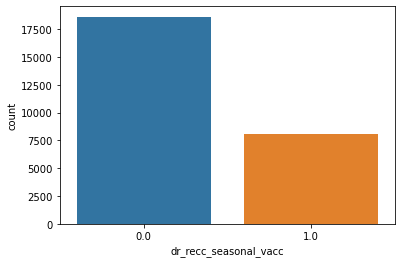

In [100]:
sns.countplot(data.dr_recc_seasonal_vacc)

<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

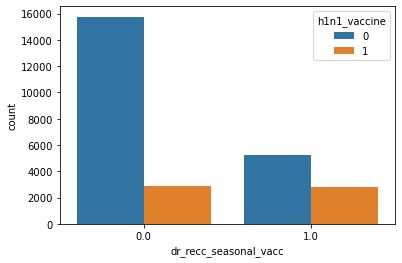

In [101]:
sns.countplot(data.dr_recc_seasonal_vacc,hue=data.h1n1_vaccine)

In [102]:
ct_dr_recc_seasonal_vacc=pd.crosstab(data.dr_recc_seasonal_vacc,data.h1n1_vaccine)
ct_dr_recc_seasonal_vacc

h1n1_vaccine,0,1
dr_recc_seasonal_vacc,,
0.0,15758,2855
1.0,5275,2819


In [103]:
chi2_contingency(ct_dr_recc_seasonal_vacc,correction=False)

(1280.6094117596108,
 1.8496635782763457e-280,
 1,
 array([[14658.59995507,  3954.40004493],
        [ 6374.40004493,  1719.59995507]]))

## dr_recc_seasonal_vacc  is a good predictor

In [104]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# chronic_medic_condition

In [105]:
data.chronic_medic_condition.isnull().sum()

971

In [106]:
data.chronic_medic_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [107]:
data.chronic_medic_condition.fillna(data.chronic_medic_condition.median(),inplace=True)

In [108]:
data.chronic_medic_condition.isnull().sum()

0

<AxesSubplot:xlabel='chronic_medic_condition', ylabel='count'>

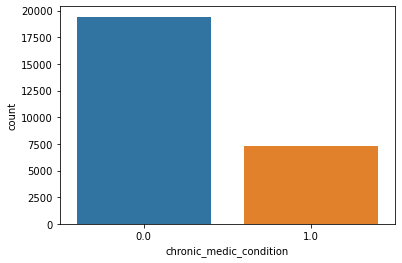

In [109]:
sns.countplot(data.chronic_medic_condition)

<AxesSubplot:xlabel='chronic_medic_condition', ylabel='count'>

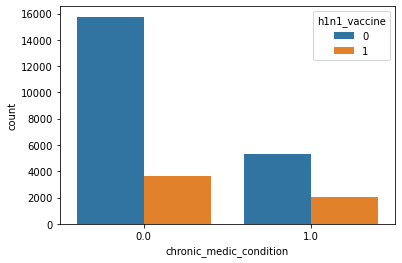

In [110]:
sns.countplot(data.chronic_medic_condition,hue=data.h1n1_vaccine)

In [111]:
ct_chronic_medic_condition=pd.crosstab(data.chronic_medic_condition,data.h1n1_vaccine)
ct_chronic_medic_condition

h1n1_vaccine,0,1
chronic_medic_condition,,
0.0,15751,3666
1.0,5282,2008


In [112]:
chi2_contingency(ct_chronic_medic_condition,correction=False)

(237.79518652408973,
 1.189768159211186e-53,
 1,
 array([[15291.78720935,  4125.21279065],
        [ 5741.21279065,  1548.78720935]]))

## chronic_medic_condition  is a good predictor

In [113]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# cont_child_undr_6_mnths

In [114]:
data.cont_child_undr_6_mnths.isnull().sum()

820

In [115]:
data.cont_child_undr_6_mnths.value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [116]:
data.cont_child_undr_6_mnths.fillna(data.cont_child_undr_6_mnths.median(),inplace=True)

In [117]:
data.cont_child_undr_6_mnths.isnull().sum()

0

<AxesSubplot:xlabel='cont_child_undr_6_mnths', ylabel='count'>

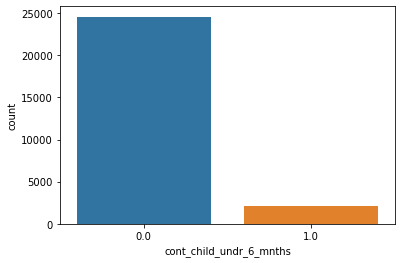

In [118]:
sns.countplot(data.cont_child_undr_6_mnths)

<AxesSubplot:xlabel='cont_child_undr_6_mnths', ylabel='count'>

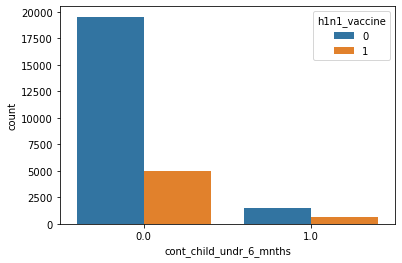

In [119]:
sns.countplot(data.cont_child_undr_6_mnths,hue=data.h1n1_vaccine)

In [120]:
ct_cont_child_undr_6_mnths=pd.crosstab(data.cont_child_undr_6_mnths,data.h1n1_vaccine)
ct_cont_child_undr_6_mnths

h1n1_vaccine,0,1
cont_child_undr_6_mnths,,
0.0,19547,5022
1.0,1486,652


In [121]:
chi2_contingency(ct_cont_child_undr_6_mnths,correction=False)

(118.85796008992361,
 1.1250395097834935e-27,
 1,
 array([[19349.22593328,  5219.77406672],
        [ 1683.77406672,   454.22593328]]))

## cont_child_undr_6_mnths is a good predictor

In [122]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_health_worker

In [123]:
data.is_health_worker.isnull().sum()

804

In [124]:
data.is_health_worker.value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [125]:
data.is_health_worker.fillna(data.is_health_worker.median(),inplace=True)

In [126]:
data.is_health_worker.isnull().sum()

0

<AxesSubplot:xlabel='is_health_worker', ylabel='count'>

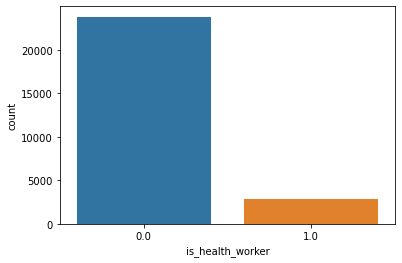

In [127]:
sns.countplot(data.is_health_worker)

<AxesSubplot:xlabel='is_health_worker', ylabel='count'>

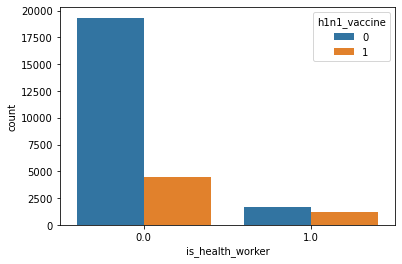

In [128]:
sns.countplot(data.is_health_worker,hue=data.h1n1_vaccine)

In [129]:
ct_is_health_worker=pd.crosstab(data.is_health_worker,data.h1n1_vaccine)
ct_is_health_worker

h1n1_vaccine,0,1
is_health_worker,,
0.0,19321,4487
1.0,1712,1187


In [130]:
chi2_contingency(ct_is_health_worker,correction=False)

(754.2809399216384,
 4.7051623310562056e-166,
 1,
 array([[18749.90317145,  5058.09682855],
        [ 2283.09682855,   615.90317145]]))

## is_health_worker is a good predictor

In [131]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# has_health_insur

In [132]:
data.has_health_insur.isnull().sum()

12274

In [133]:
data.has_health_insur.value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [134]:
data.has_health_insur.fillna(data.has_health_insur.median(),inplace=True)

In [135]:
data.has_health_insur.isnull().sum()

0

<AxesSubplot:xlabel='has_health_insur', ylabel='count'>

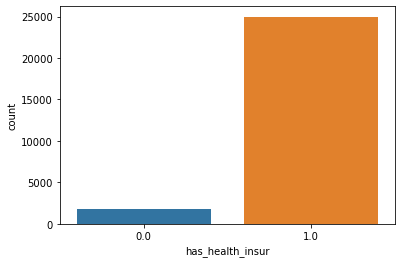

In [136]:
sns.countplot(data.has_health_insur)

<AxesSubplot:xlabel='has_health_insur', ylabel='count'>

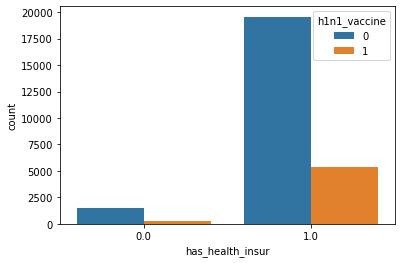

In [137]:
sns.countplot(data.has_health_insur,hue=data.h1n1_vaccine)

In [138]:
ct_has_health_insur=pd.crosstab(data.has_health_insur,data.h1n1_vaccine)
ct_has_health_insur

h1n1_vaccine,0,1
has_health_insur,,
0.0,1480,256
1.0,19553,5418


In [139]:
chi2_contingency(ct_has_health_insur,correction=False)

(46.86708224278411,
 7.596804097525478e-12,
 1,
 array([[ 1367.18043959,   368.81956041],
        [19665.81956041,  5305.18043959]]))

## has_health_insur is a good predictor

In [140]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_h1n1_vacc_effective

In [141]:
data.is_h1n1_vacc_effective.isnull().sum()

391

In [142]:
data.is_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [143]:
data.is_h1n1_vacc_effective.fillna(data.is_h1n1_vacc_effective.median(),inplace=True)

In [144]:
data.is_h1n1_vacc_effective.isnull().sum()

0

<AxesSubplot:xlabel='is_h1n1_vacc_effective', ylabel='count'>

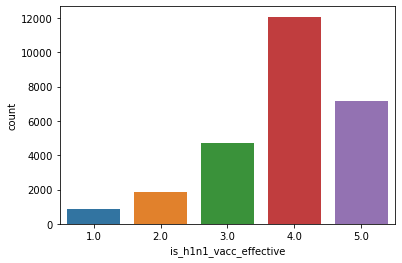

In [145]:
sns.countplot(data.is_h1n1_vacc_effective)

<AxesSubplot:xlabel='is_h1n1_vacc_effective', ylabel='count'>

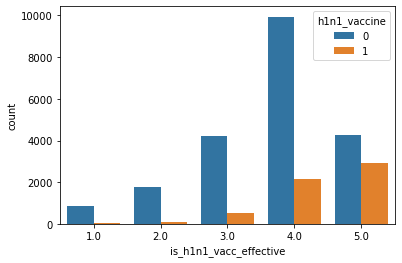

In [146]:
sns.countplot(data.is_h1n1_vacc_effective,hue=data.h1n1_vaccine)

In [147]:
ct_is_h1n1_vacc_effective=pd.crosstab(data.is_h1n1_vacc_effective,data.h1n1_vaccine)
ct_is_h1n1_vacc_effective

h1n1_vaccine,0,1
is_h1n1_vacc_effective,,
1.0,844,42
2.0,1763,95
3.0,4224,499
4.0,9937,2137
5.0,4265,2901


In [148]:
chi2_contingency(ct_is_h1n1_vacc_effective,correction=False)

(2430.9882283574093,
 0.0,
 4,
 array([[ 697.76605384,  188.23394616],
        [1463.2610926 ,  394.7389074 ],
        [3719.58134571, 1003.41865429],
        [9508.83446287, 2565.16553713],
        [5643.55704497, 1522.44295503]]))

# is_h1n1_vacc_effective is a bad predictor

In [149]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_h1n1_risky

In [150]:
data.is_h1n1_risky.isnull().sum()

388

In [151]:
data.is_h1n1_risky.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [152]:
data.is_h1n1_risky.fillna(data.is_h1n1_risky.median(),inplace=True)

In [153]:
data.is_h1n1_risky.isnull().sum()

0

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='count'>

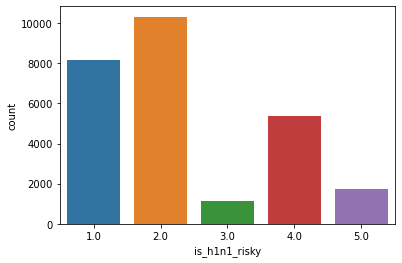

In [154]:
sns.countplot(data.is_h1n1_risky)

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='count'>

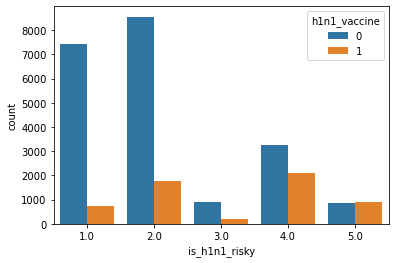

In [155]:
sns.countplot(data.is_h1n1_risky,hue=data.h1n1_vaccine)

In [156]:
ct_is_h1n1_risky=pd.crosstab(data.is_h1n1_risky,data.h1n1_vaccine)
ct_is_h1n1_risky

h1n1_vaccine,0,1
is_h1n1_risky,,
1.0,7420,719
2.0,8555,1752
3.0,923,194
4.0,3279,2115
5.0,856,894


In [157]:
chi2_contingency(ct_is_h1n1_risky,correction=False)

(2842.259854334096,
 0.0,
 4,
 array([[6409.83963006, 1729.16036994],
        [8117.24008687, 2189.75991313],
        [ 879.6892575 ,  237.3107425 ],
        [4248.02493728, 1145.97506272],
        [1378.20608829,  371.79391171]]))

# _is_h1n1_risky is not a good predictor

In [158]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sick_from_h1n1_vacc

In [159]:
data.sick_from_h1n1_vacc.isnull().sum()

395

In [160]:
data.sick_from_h1n1_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [161]:
data.sick_from_h1n1_vacc.fillna(data.sick_from_h1n1_vacc.median(),inplace=True)

In [162]:
data.sick_from_h1n1_vacc.isnull().sum()

0

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='count'>

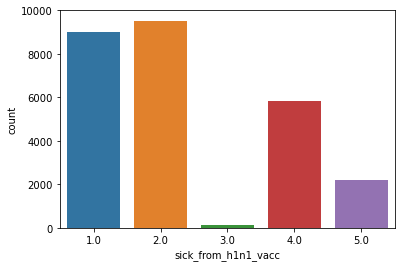

In [163]:
sns.countplot(data.sick_from_h1n1_vacc)

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='count'>

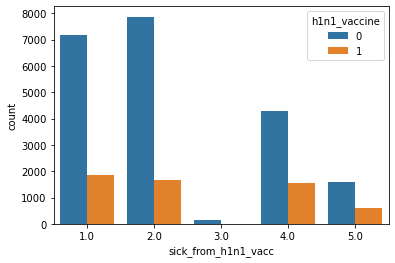

In [164]:
sns.countplot(data.sick_from_h1n1_vacc,hue=data.h1n1_vaccine)

In [165]:
ct_sick_from_h1n1_vacc=pd.crosstab(data.sick_from_h1n1_vacc,data.h1n1_vaccine)
ct_sick_from_h1n1_vacc

h1n1_vaccine,0,1
sick_from_h1n1_vacc,,
1.0,7157,1841
2.0,7862,1662
3.0,136,12
4.0,4304,1546
5.0,1574,613


In [166]:
chi2_contingency(ct_sick_from_h1n1_vacc,correction=False)

(254.59089268297026,
 6.675769368968441e-54,
 4,
 array([[7086.34193283, 1911.65806717],
        [7500.59130565, 2023.40869435],
        [ 116.55685775,   31.44314225],
        [4607.14606657, 1242.85393343],
        [1722.3638372 ,  464.6361628 ]]))

# sick_from_h1n1_vacc is a good predictor

In [167]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_seas_vacc_effective

In [168]:
data.is_seas_vacc_effective.isnull().sum()

462

In [169]:
data.is_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [170]:
data.is_seas_vacc_effective.fillna(data.is_seas_vacc_effective.median(),inplace=True)

In [171]:
data.is_seas_vacc_effective.isnull().sum()

0

<AxesSubplot:xlabel='is_seas_vacc_effective', ylabel='count'>

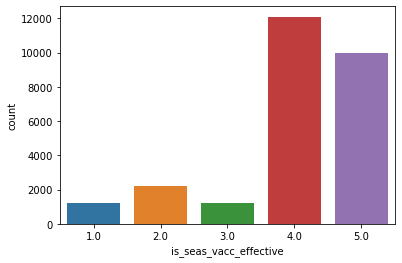

In [172]:
sns.countplot(data.is_seas_vacc_effective)

<AxesSubplot:xlabel='is_seas_vacc_effective', ylabel='count'>

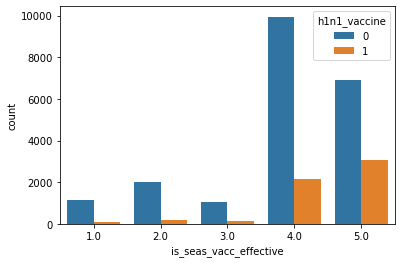

In [173]:
sns.countplot(data.is_seas_vacc_effective,hue=data.h1n1_vaccine)

In [174]:
ct_is_seas_vacc_effective=pd.crosstab(data.is_seas_vacc_effective,data.h1n1_vaccine)
ct_is_seas_vacc_effective

h1n1_vaccine,0,1
is_seas_vacc_effective,,
1.0,1132,89
2.0,2001,205
3.0,1054,162
4.0,9949,2142
5.0,6897,3076


In [175]:
chi2_contingency(ct_is_seas_vacc_effective,correction=False)

(1015.2358583203843,
 1.7812550798256757e-218,
 4,
 array([[ 961.59407646,  259.40592354],
        [1737.32721758,  468.67278242],
        [ 957.65634478,  258.34365522],
        [9522.22275059, 2568.77724941],
        [7854.19961059, 2118.80038941]]))

# _is_seas_vacc_effective is a good predictor

In [176]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# is_seas_risky

In [177]:
data.is_seas_risky.isnull().sum()

514

In [178]:
data.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [179]:
data.is_seas_risky.fillna(data.is_seas_risky.median(),inplace=True)

In [180]:
data.is_seas_risky.isnull().sum()

0

<AxesSubplot:xlabel='is_seas_risky', ylabel='count'>

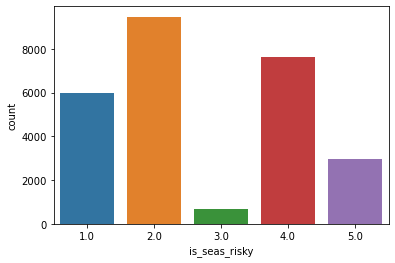

In [181]:
sns.countplot(data.is_seas_risky)

<AxesSubplot:xlabel='is_seas_risky', ylabel='count'>

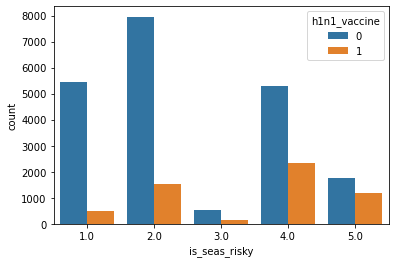

In [182]:
sns.countplot(data.is_seas_risky,hue=data.h1n1_vaccine)

In [183]:
ct_is_seas_risky=pd.crosstab(data.is_seas_risky,data.h1n1_vaccine)
ct_is_seas_risky

h1n1_vaccine,0,1
is_seas_risky,,
1.0,5468,506
2.0,7953,1515
3.0,541,136
4.0,5295,2335
5.0,1776,1182


In [184]:
chi2_contingency(ct_is_seas_risky,correction=False)

(1757.3448032431027,
 0.0,
 4,
 array([[4704.80181226, 1269.19818774],
        [7456.48871082, 2011.51128918],
        [ 533.16886958,  143.83113042],
        [6008.97854495, 1621.02145505],
        [2329.56206238,  628.43793762]]))

## is_seas_risky  is not a good predictor

In [185]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sick_from_seas_vacc

In [186]:
data.sick_from_seas_vacc.isnull().sum()

537

In [187]:
data.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [188]:
data.sick_from_seas_vacc.fillna(data.sick_from_seas_vacc.median(),inplace=True)

In [189]:
data.sick_from_seas_vacc.isnull().sum()

0

<AxesSubplot:xlabel='sick_from_seas_vacc', ylabel='count'>

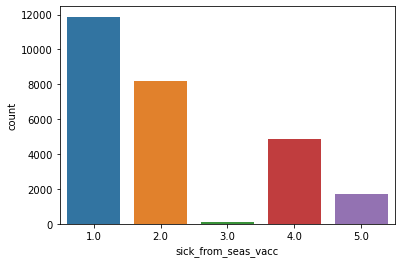

In [190]:
sns.countplot(data.sick_from_seas_vacc)

<AxesSubplot:xlabel='sick_from_seas_vacc', ylabel='count'>

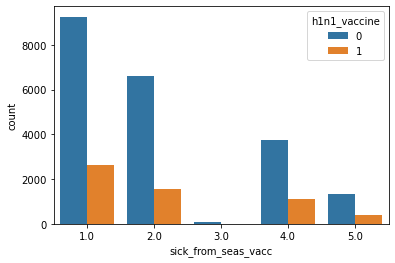

In [191]:
sns.countplot(data.sick_from_seas_vacc,hue=data.h1n1_vaccine)

In [192]:
ct_sick_from_seas_vacc=pd.crosstab(data.sick_from_seas_vacc,data.h1n1_vaccine)
ct_sick_from_seas_vacc

h1n1_vaccine,0,1
sick_from_seas_vacc,,
1.0,9252,2618
2.0,6622,1548
3.0,86,8
4.0,3740,1112
5.0,1333,388


In [193]:
chi2_contingency(ct_sick_from_seas_vacc,correction=False)

(49.40828609704075,
 4.798772079624467e-10,
 4,
 array([[9348.1750103 , 2521.8249897 ],
        [6434.25356648, 1735.74643352],
        [  74.0293556 ,   19.9706444 ],
        [3821.17482308, 1030.82517692],
        [1355.36724454,  365.63275546]]))

## sick_from_seas_vacc is a good predictor

In [194]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# age_bracket

In [195]:
data.age_bracket.isnull().sum()

0

In [196]:
data.age_bracket.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

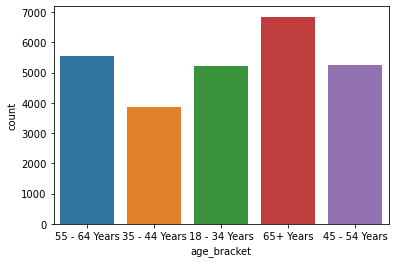

In [197]:
sns.countplot(data.age_bracket)

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

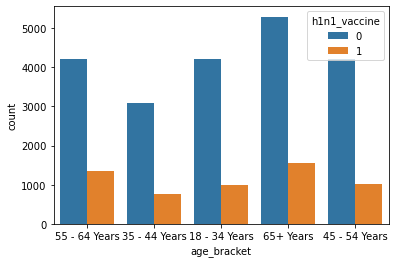

In [198]:
sns.countplot(data.age_bracket,hue=data.h1n1_vaccine)

In [199]:
ct_age_bracket=pd.crosstab(data.age_bracket,data.h1n1_vaccine)
ct_age_bracket

h1n1_vaccine,0,1
age_bracket,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [200]:
chi2_contingency(ct_age_bracket,correction=False)

(69.44576247937547,
 2.9716028185463074e-14,
 4,
 array([[4107.05414311, 1107.94585689],
        [3030.47830157,  817.52169843],
        [4125.16770884, 1112.83229116],
        [4381.12026809, 1181.87973191],
        [5389.17957839, 1453.82042161]]))

## age_bracket is a good predictor

In [201]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# qualification

In [202]:
data.qualification.isnull().sum()

1407

In [203]:
data.qualification.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [204]:
data.qualification.describe()

count                25300
unique                   4
top       College Graduate
freq                 10097
Name: qualification, dtype: object

In [113]:
data.qualification.head()

0          < 12 Years
1            12 Years
2    College Graduate
3            12 Years
4        Some College
Name: qualification, dtype: object

In [114]:
data.qualification.replace(['< 12 Years','12 Years','Some College','College Graduate'],[0,1,2,3],inplace=True)

In [115]:
data.qualification.fillna(data.qualification.median(),inplace=True)

In [116]:
data.qualification.isnull().sum()

0

<AxesSubplot:xlabel='qualification', ylabel='count'>

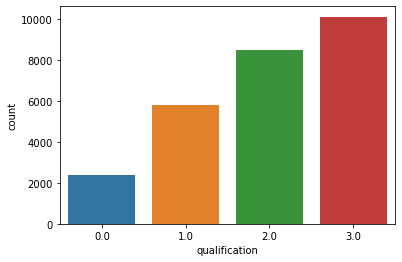

In [117]:
sns.countplot(data.qualification)

<AxesSubplot:xlabel='qualification', ylabel='count'>

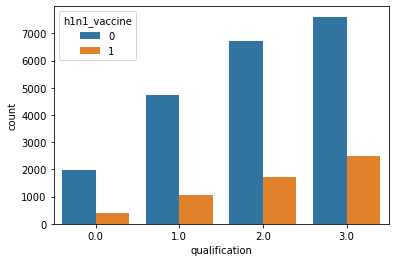

In [118]:
sns.countplot(data.qualification,hue=data.h1n1_vaccine)

In [119]:
ct_qualification=pd.crosstab(data.qualification,data.h1n1_vaccine)
ct_qualification

h1n1_vaccine,0,1
qualification,,
0.0,1968,395
1.0,4726,1071
2.0,6725,1725
3.0,7614,2483


In [120]:
chi2_contingency(ct_qualification,correction=False)

(126.61761299305014,
 2.8967568032357582e-27,
 3,
 array([[1860.97199236,  502.02800764],
        [4565.40611076, 1231.59388924],
        [6654.76654061, 1795.23345939],
        [7951.85535627, 2145.14464373]]))

## qualification is a good predictor

In [121]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# race

In [207]:
data.race.isnull().sum()

0

In [208]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

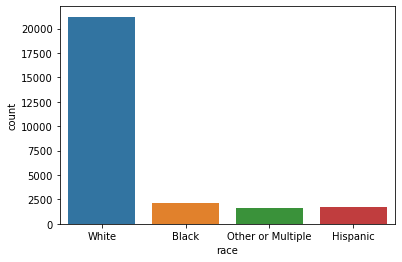

In [209]:
sns.countplot(data.race)

<AxesSubplot:xlabel='race', ylabel='count'>

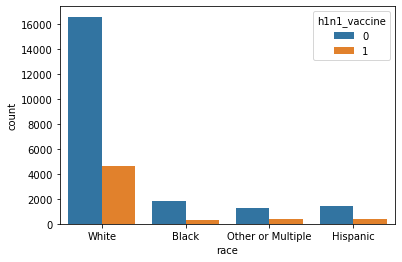

In [210]:
sns.countplot(data.race,hue=data.h1n1_vaccine)

In [211]:
ct_race=pd.crosstab(data.race,data.h1n1_vaccine)
ct_race

h1n1_vaccine,0,1
race,,
Black,1803,315
Hispanic,1390,365
Other or Multiple,1263,349
White,16577,4645


In [212]:
chi2_contingency(ct_race,correction=False)

(57.01119582422927,
 2.5557770361705444e-12,
 3,
 array([[ 1668.02314   ,   449.97686   ],
        [ 1382.14381997,   372.85618003],
        [ 1269.5246939 ,   342.4753061 ],
        [16713.30834613,  4508.69165387]]))

# race is a good predictor

In [213]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# sex

In [214]:
data.sex.isnull().sum()

0

In [215]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

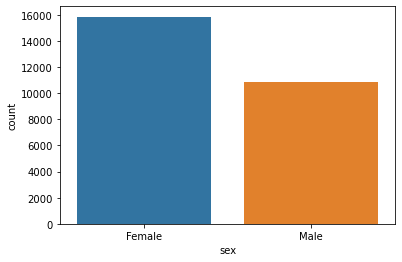

In [216]:
sns.countplot(data.sex)

<AxesSubplot:xlabel='sex', ylabel='count'>

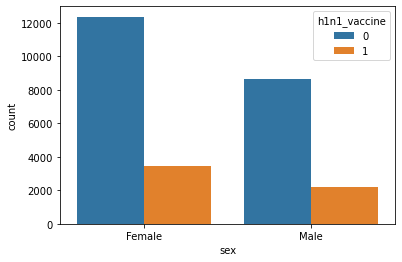

In [217]:
sns.countplot(data.sex,hue=data.h1n1_vaccine)

In [218]:
ct_sex=pd.crosstab(data.sex,data.h1n1_vaccine)
ct_sex

h1n1_vaccine,0,1
sex,,
Female,12378,3480
Male,8655,2194


In [219]:
chi2_contingency(ct_sex,correction=False)

(11.412649487692018,
 0.0007294572775631631,
 1,
 array([[12488.90979893,  3369.09020107],
        [ 8544.09020107,  2304.90979893]]))

## sex is a good predictor

In [13]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [13]:
data.income_level.isnull().sum()

4423

In [15]:
data.income_level.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [18]:
data.income_level.mode()

0    <= $75,000, Above Poverty
dtype: object

In [22]:
data.income_level.fillna(data.income_level.mode(),inplace=True)

In [23]:
data.income_level.isnull().sum()

4423

<AxesSubplot:xlabel='income_level', ylabel='count'>

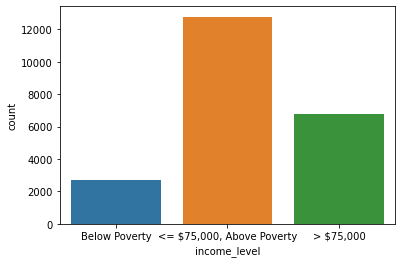

In [21]:
sns.countplot(data.income_level)

<AxesSubplot:xlabel='income_level', ylabel='count'>

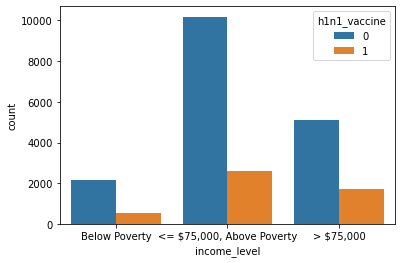

In [29]:
sns.countplot(data.income_level,hue=data.h1n1_vaccine)

In [30]:
ct_income_level=pd.crosstab(data.income_level,data.h1n1_vaccine)
ct_income_level

h1n1_vaccine,0,1
income_level,,
"<= $75,000, Above Poverty",10178,2599
"> $75,000",5087,1723
Below Poverty,2181,516


In [31]:
chi2_contingency(ct_income_level,correction=False)

(76.29255373088355,
 2.711954833043555e-17,
 2,
 array([[10003.03096392,  2773.96903608],
        [ 5331.50511578,  1478.49488422],
        [ 2111.4639203 ,   585.5360797 ]]))

## income_level is a good predictor

In [32]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# marital_status

In [33]:
data.marital_status.isnull().sum()

1408

In [34]:
data.marital_status.value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [42]:
data.marital_status

0        Not Married
1        Not Married
2        Not Married
3        Not Married
4            Married
5            Married
6        Not Married
7            Married
8            Married
9        Not Married
10           Married
11           Married
12           Married
13           Married
14           Married
15           Married
16           Married
17       Not Married
18           Married
19           Married
20       Not Married
21       Not Married
22           Married
23       Not Married
24       Not Married
25           Married
26           Married
27           Married
28           Married
29       Not Married
30       Not Married
31       Not Married
32           Married
33       Not Married
34           Married
35       Not Married
36           Married
37       Not Married
38           Married
39       Not Married
40       Not Married
41           Married
42           Married
43       Not Married
44       Not Married
45           Married
46           Married
47           

In [43]:
data.marital_status.replace(['Not Married','Married'],[0,1],inplace=True)

In [46]:
data.marital_status.fillna(data.marital_status.median(),inplace=True)

In [47]:
data.marital_status.isnull().sum()

0

In [48]:
data.marital_status.astype('int')

0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        1
8        1
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       0
18       1
19       1
20       0
21       0
22       1
23       0
24       0
25       1
26       1
27       1
28       1
29       0
30       0
31       0
32       1
33       0
34       1
35       0
36       1
37       0
38       1
39       0
40       0
41       1
42       1
43       0
44       0
45       1
46       1
47       1
48       1
49       1
50       1
51       0
52       1
53       0
54       0
55       1
56       0
57       1
58       1
59       1
60       0
61       1
62       0
63       0
64       1
65       0
66       0
67       0
68       1
69       0
70       1
71       0
72       0
73       0
74       1
75       1
76       0
77       1
78       0
79       1
80       0
81       1
82       1
83       0
84       1
85       1
86       1
87       1
88       0
89       1
90       0

<AxesSubplot:xlabel='marital_status', ylabel='count'>

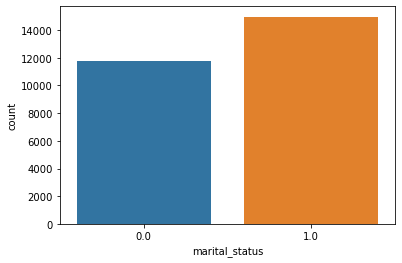

In [52]:
sns.countplot(data.marital_status)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

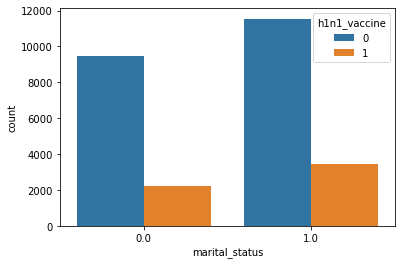

In [54]:
sns.countplot(data.marital_status,hue=data.h1n1_vaccine)

In [57]:
ct_marital_status=pd.crosstab(data.marital_status,data.h1n1_vaccine)
ct_marital_status

h1n1_vaccine,0,1
marital_status,,
0.0,9494,2250
1.0,11539,3424


In [59]:
chi2_contingency(ct_marital_status,correction=False)

(54.54816163124884,
 1.5168447863996744e-13,
 1,
 array([[ 9248.94417194,  2495.05582806],
        [11784.05582806,  3178.94417194]]))

## marital_status is a good predictor

In [60]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

## housing_status

In [61]:
data.housing_status.isnull().sum()

2042

In [64]:
data.housing_status.value_counts()

Own     18736
Rent     5929
Name: housing_status, dtype: int64

In [65]:
data.housing_status.head()

0     Own
1    Rent
2     Own
3    Rent
4     Own
Name: housing_status, dtype: object

In [66]:
data.housing_status.replace(['Own','Rent'],[0,1],inplace=True)

In [67]:
data.housing_status.fillna(data.housing_status.median(),inplace=True)

In [68]:
data.housing_status.isnull().sum()

0

<AxesSubplot:xlabel='housing_status', ylabel='count'>

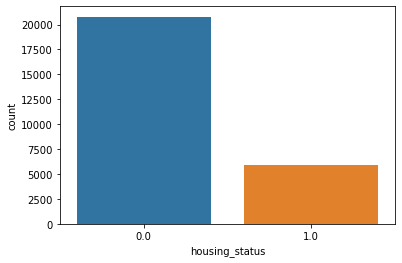

In [69]:
sns.countplot(data.housing_status)

<AxesSubplot:xlabel='housing_status', ylabel='count'>

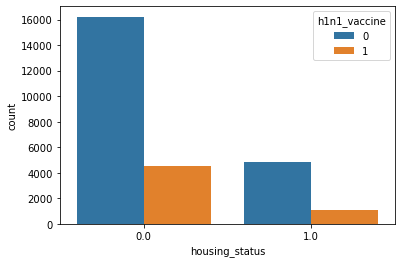

In [70]:
sns.countplot(data.housing_status,hue=data.h1n1_vaccine)

In [71]:
ct_housing_status=pd.crosstab(data.housing_status,data.h1n1_vaccine)
ct_housing_status

h1n1_vaccine,0,1
housing_status,,
0.0,16223,4555
1.0,4810,1119


In [72]:
chi2_contingency(ct_housing_status,correction=False)

(25.627340211011663,
 4.1413001799506495e-07,
 1,
 array([[16363.63777287,  4414.36222713],
        [ 4669.36222713,  1259.63777287]]))

## housing_status is a good predictor

In [74]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# employment

In [75]:
data.employment.isnull().sum()

1463

In [76]:
data.employment.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

In [78]:
data.employment.head()

0    Not in Labor Force
1              Employed
2              Employed
3    Not in Labor Force
4              Employed
Name: employment, dtype: object

In [80]:
data.employment.replace(['Employed','Not in Labor Force','Unemployed'],[0,1,2],inplace=True)

In [81]:
data.employment.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: employment, dtype: float64

In [82]:
data.employment.fillna(data.employment.median(),inplace=True)

In [84]:
data.employment.isnull().sum()

0

<AxesSubplot:xlabel='employment', ylabel='count'>

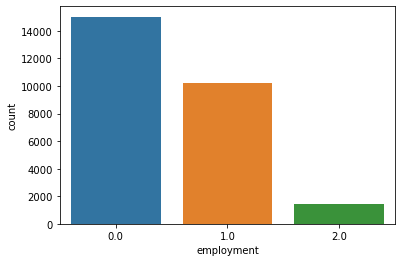

In [85]:
sns.countplot(data.employment)

<AxesSubplot:xlabel='employment', ylabel='count'>

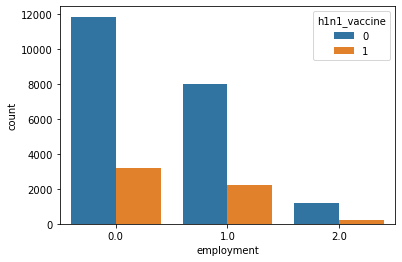

In [86]:
sns.countplot(data.employment,hue=data.h1n1_vaccine)

In [87]:
ct_employment=pd.crosstab(data.employment,data.h1n1_vaccine)
ct_employment

h1n1_vaccine,0,1
employment,,
0.0,11829,3194
1.0,7988,2243
2.0,1216,237


In [88]:
chi2_contingency(ct_employment,correction=False)

(23.957973424416053,
 6.274688521364308e-06,
 2,
 array([[11831.30860823,  3191.69139177],
        [ 8057.38656532,  2173.61343468],
        [ 1144.30482645,   308.69517355]]))

## employment is a good predictor

In [89]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [90]:
data.census_msa.isnull().sum()

0

In [91]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

<AxesSubplot:xlabel='census_msa', ylabel='count'>

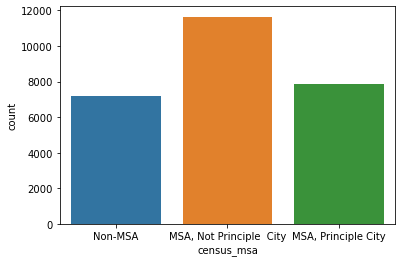

In [92]:
sns.countplot(data.census_msa)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

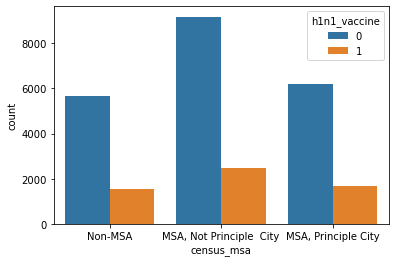

In [93]:
sns.countplot(data.census_msa,hue=data.h1n1_vaccine)

In [96]:
ct_census_msa=pd.crosstab(data.census_msa,data.h1n1_vaccine)
ct_census_msa

h1n1_vaccine,0,1
census_msa,,
"MSA, Not Principle City",9178,2467
"MSA, Principle City",6183,1681
Non-MSA,5672,1526


In [97]:
chi2_contingency(ct_census_msa,correction=False)

(0.11411029118541836,
 0.9445419806029446,
 2,
 array([[9170.97708466, 2474.02291534],
        [6193.26438761, 1670.73561239],
        [5668.75852773, 1529.24147227]]))

## census_msa is not a good predictor

# no_of_adults

In [98]:
data.no_of_adults.isnull().sum()

249

In [99]:
data.no_of_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [100]:
data.no_of_adults.fillna(data.no_of_adults.median(),inplace=True)

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

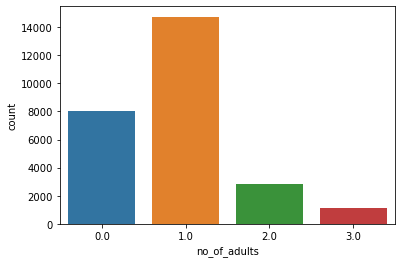

In [101]:
sns.countplot(data.no_of_adults)

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

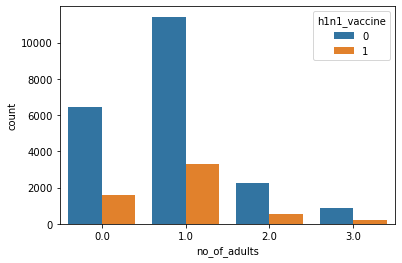

In [102]:
sns.countplot(data.no_of_adults,hue=data.h1n1_vaccine)

In [103]:
ct_no_of_adults=pd.crosstab(data.no_of_adults,data.h1n1_vaccine)
ct_no_of_adults

h1n1_vaccine,0,1
no_of_adults,,
0.0,6471,1585
1.0,11419,3304
2.0,2240,563
3.0,903,222


In [104]:
chi2_contingency(ct_no_of_adults,correction=False)

(28.248225641051818,
 3.221377736825649e-06,
 3,
 array([[ 6344.47328416,  1711.52671584],
        [11595.04470738,  3127.95529262],
        [ 2207.49238027,   595.50761973],
        [  885.98962819,   239.01037181]]))

## no_of_adults is a good predictor

In [105]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

# no_of_children

In [106]:
data.no_of_children.isnull().sum()

249

In [107]:
data.no_of_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [108]:
data.no_of_children.fillna(data.no_of_children.median(),inplace=True)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

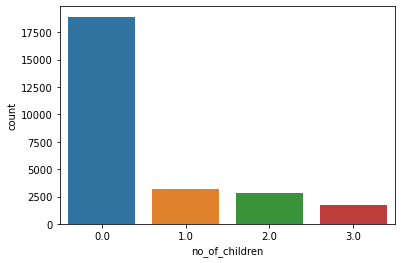

In [109]:
sns.countplot(data.no_of_children)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

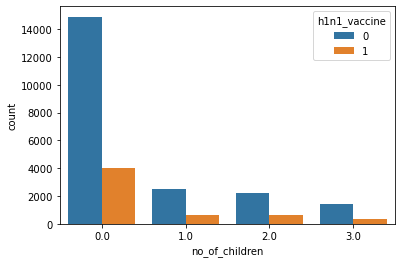

In [110]:
sns.countplot(data.no_of_children,hue=data.h1n1_vaccine)

In [111]:
ct_no_of_children=pd.crosstab(data.no_of_children,data.h1n1_vaccine)
ct_no_of_children

h1n1_vaccine,0,1
no_of_children,,
0.0,14899,4022
1.0,2501,674
2.0,2235,629
3.0,1398,349


In [112]:
chi2_contingency(ct_no_of_children,correction=False)

(2.561284667933834,
 0.4643173046901464,
 3,
 array([[14901.16422661,  4019.83577339],
        [ 2500.45961733,   674.54038267],
        [ 2255.53270678,   608.46729322],
        [ 1375.84344928,   371.15655072]]))

# no_of_children is not a good predictor